# Tabular Feasibility

This project focuses detecting thrrats in network traffic. This dataset, part of the UNSW-NB15 benchmark, provides labeled data for normal and attack sessions.

Dataset Description:
The dataset contains 82,332 rows and 45 features, including both numerical and categorical types. The label column is the target, where 0 indicates a normal session and 1 an attack.


---

Machine Learning Task:

Type: Supervised Classification (Binary)

Target Variable: label

Encoding: 0 = Normal, 1 = Attack

---


Class Distribution:

Normal (0): 37,000 samples

Attack (1): 45,332 samples

The classes are relatively balanced.

# Data Loading and Initial Look

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("UNSW_NB15_training-set.csv")
df = df.drop('id', axis=1)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
# EDA Analysis

# shape of the dataset
print(" Dataset shape:", df.shape)
print("--"*20)
# information about the dataset
print("\n\Feeature Info:\n", df.info())
print("--"*20)
# descriptive statistics of numerical col
print("\nDescriptive statistics:\n", df.describe())

 Dataset shape: (82332, 44)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  s

In [ ]:
# Determine feature types and value ranges
feature_summary = []
for col in df.columns:
    col_type = df[col].dtype
    if col_type == 'object':
        unique_vals = df[col].dropna().unique()
        values_summary = ', '.join(map(str, unique_vals[:5])) + ('...' if len(unique_vals) > 5 else '')
        feature_type = 'categorical'
        value_range = values_summary
    else:
        feature_type = 'numerical'
        value_range = f"{df[col].min()} to {df[col].max()}"

    num_missing = df[col].isnull().sum()
    feature_summary.append({
        'Feature': col,
        'Type': feature_type,
        'Value Range': value_range,
        'Missing Values': num_missing
    })

feature_summary_df = pd.DataFrame(feature_summary)
display(feature_summary_df.head(10))

,Feature,Type,Value Range,Missing Values
0,dur,numerical,0.0 to 59.999989,0
1,proto,categorical,"udp, arp, tcp, igmp, ospf...",0
2,service,categorical,"-, http, ftp, ftp-data, smtp...",0
3,state,categorical,"INT, FIN, REQ, ACC, CON...",0
4,spkts,numerical,1 to 10646,0
5,dpkts,numerical,0 to 11018,0
6,sbytes,numerical,24 to 14355774,0
7,dbytes,numerical,0 to 14657531,0
8,rate,numerical,0.0 to 1000000.003,0
9,sttl,numerical,0 to 255,0


In [ ]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
print("Categorical features:", categorical_features)

for col in categorical_features:
    print(f"\nUnique values for '{col}':")
    print(df[col].unique())

Categorical features: ['proto', 'service', 'state', 'attack_cat']

Unique values for 'proto':
['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zer

In [ ]:
# Check for outliers
outliers = {}
for col in df.select_dtypes(include='number').columns:
    mean = df[col].mean()
    std = df[col].std()
    outliers[col] = ((df[col] < mean - 3*std) | (df[col] > mean + 3*std)).sum()

outliers_df = pd.DataFrame(list(outliers.items()), columns=['Feature', 'Outlier Count'])

num_rows, num_features = df.shape
missing_values = df.isnull().sum()
missing_summary = missing_values[missing_values > 0]

display(outliers_df.head(45))

,Feature,Outlier Count
0,dur,1063
1,spkts,218
2,dpkts,701
3,sbytes,102
4,dbytes,649
5,rate,1036
6,sttl,0
7,dttl,0
8,sload,1372
9,dload,2737


In [ ]:
print(df.label.value_counts())

label
1    45332
0    37000
Name: count, dtype: int64


The classes are relatively balanced. Normal = 0 and Attack = 1. There are also 9 different attack types that count for 'Attack'.

# Data Visualization

In [ ]:
label_col = 'label'
features = df.columns.drop(label_col)

numerical_features = df.select_dtypes(include=np.number).columns.drop(label_col, errors='ignore')
categorical_features = df.select_dtypes(include='object').columns.tolist()

# --- Summarize Categorical Features (Tables/Count Plots) ---
if len(categorical_features) > 0:
    print("\nSummarizing categorical features with tables/count plots...")
    for feature in categorical_features:
        print(f"\nDistribution of '{feature}' by label:")
        display(pd.crosstab(df[feature], df[label_col]))

else:
    print("\nNo categorical features to summarize.")


Summarizing categorical features with tables/count plots...

Distribution of 'proto' by label:


label,0,1
proto,,
3pc,0,32
a/n,0,32
aes-sp3-d,0,32
any,0,96
argus,0,33
...,...,...
wsn,0,32
xnet,0,33
xns-idp,0,34



Distribution of 'service' by label:


label,0,1
service,,
-,27375,19778
dhcp,0,26
dns,3068,18299
ftp,758,794
ftp-data,949,447
http,4013,4274
irc,0,5
pop3,0,423
radius,2,7



Distribution of 'state' by label:


label,0,1
state,,
ACC,2,2
CLO,0,1
CON,6633,349
FIN,24172,15167
INT,4485,29678
REQ,1707,135
RST,1,0



Distribution of 'attack_cat' by label:


label,0,1
attack_cat,,
Analysis,0,677
Backdoor,0,583
DoS,0,4089
Exploits,0,11132
Fuzzers,0,6062
Generic,0,18871
Normal,37000,0
Reconnaissance,0,3496
Shellcode,0,378


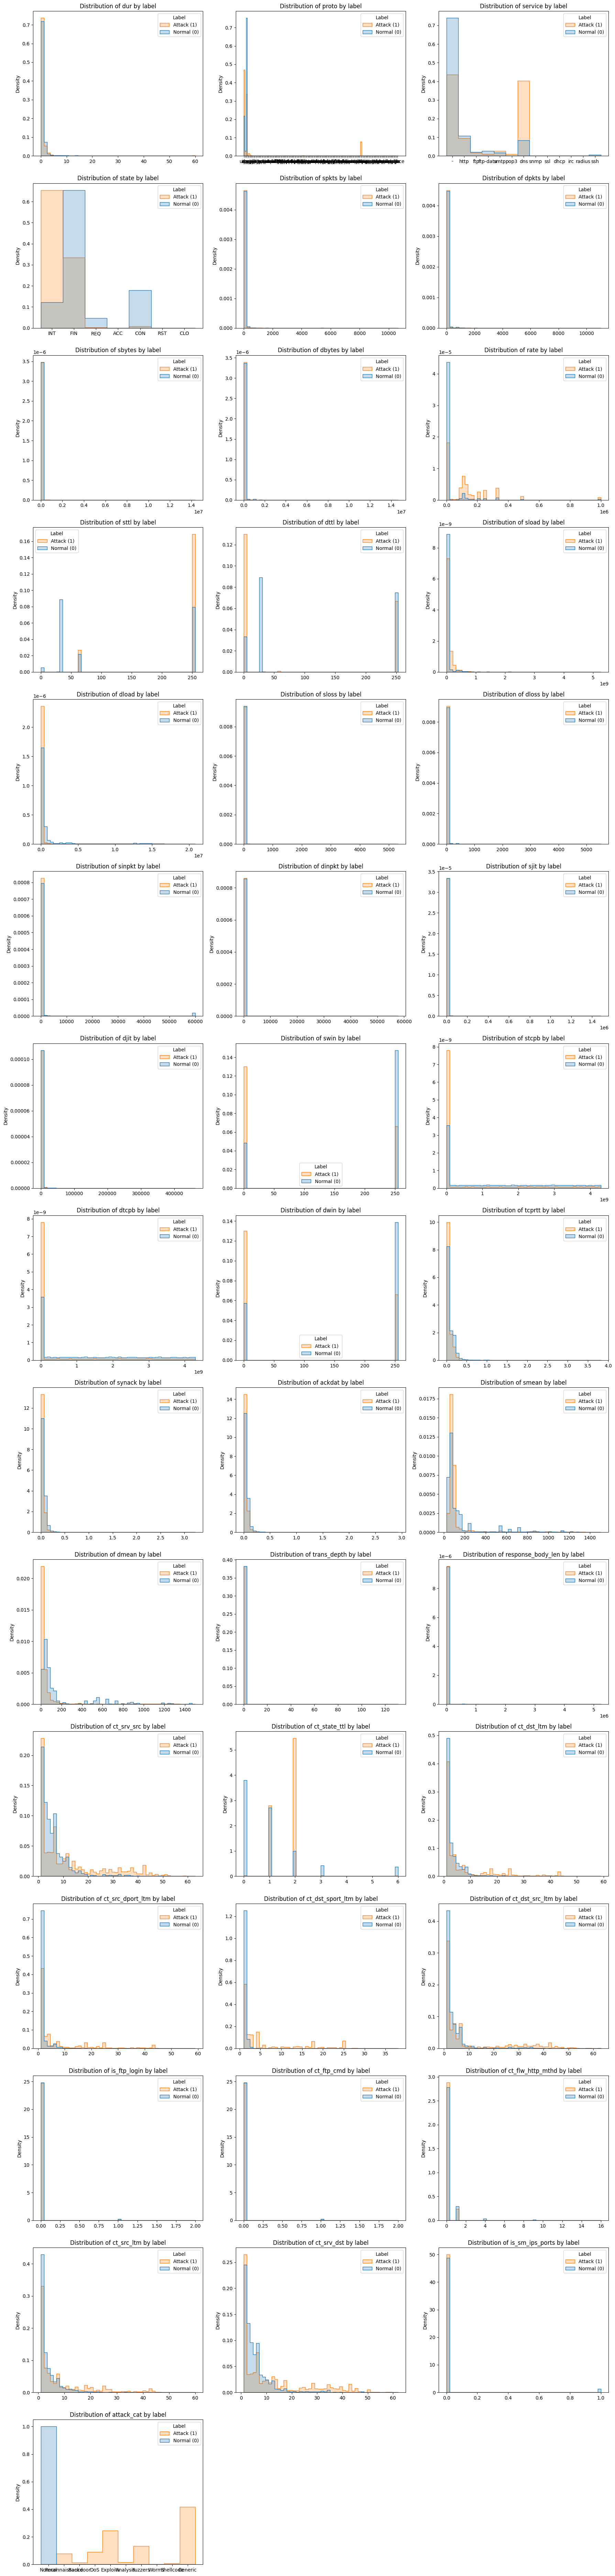

In [ ]:
label_col = 'label'
features_to_visualize = df.columns.drop(label_col) # Exclude the target variable

n_features = len(features_to_visualize)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot histograms for each feature
for idx, feature in enumerate(features_to_visualize):
    sns.histplot(data=df, x=feature, hue=label_col, bins=50, kde=False,
                 element="step", stat="density", common_norm=False, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature} by label')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Density')
    axes[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)']) # Add legend

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Generating refined histograms for numerical features...


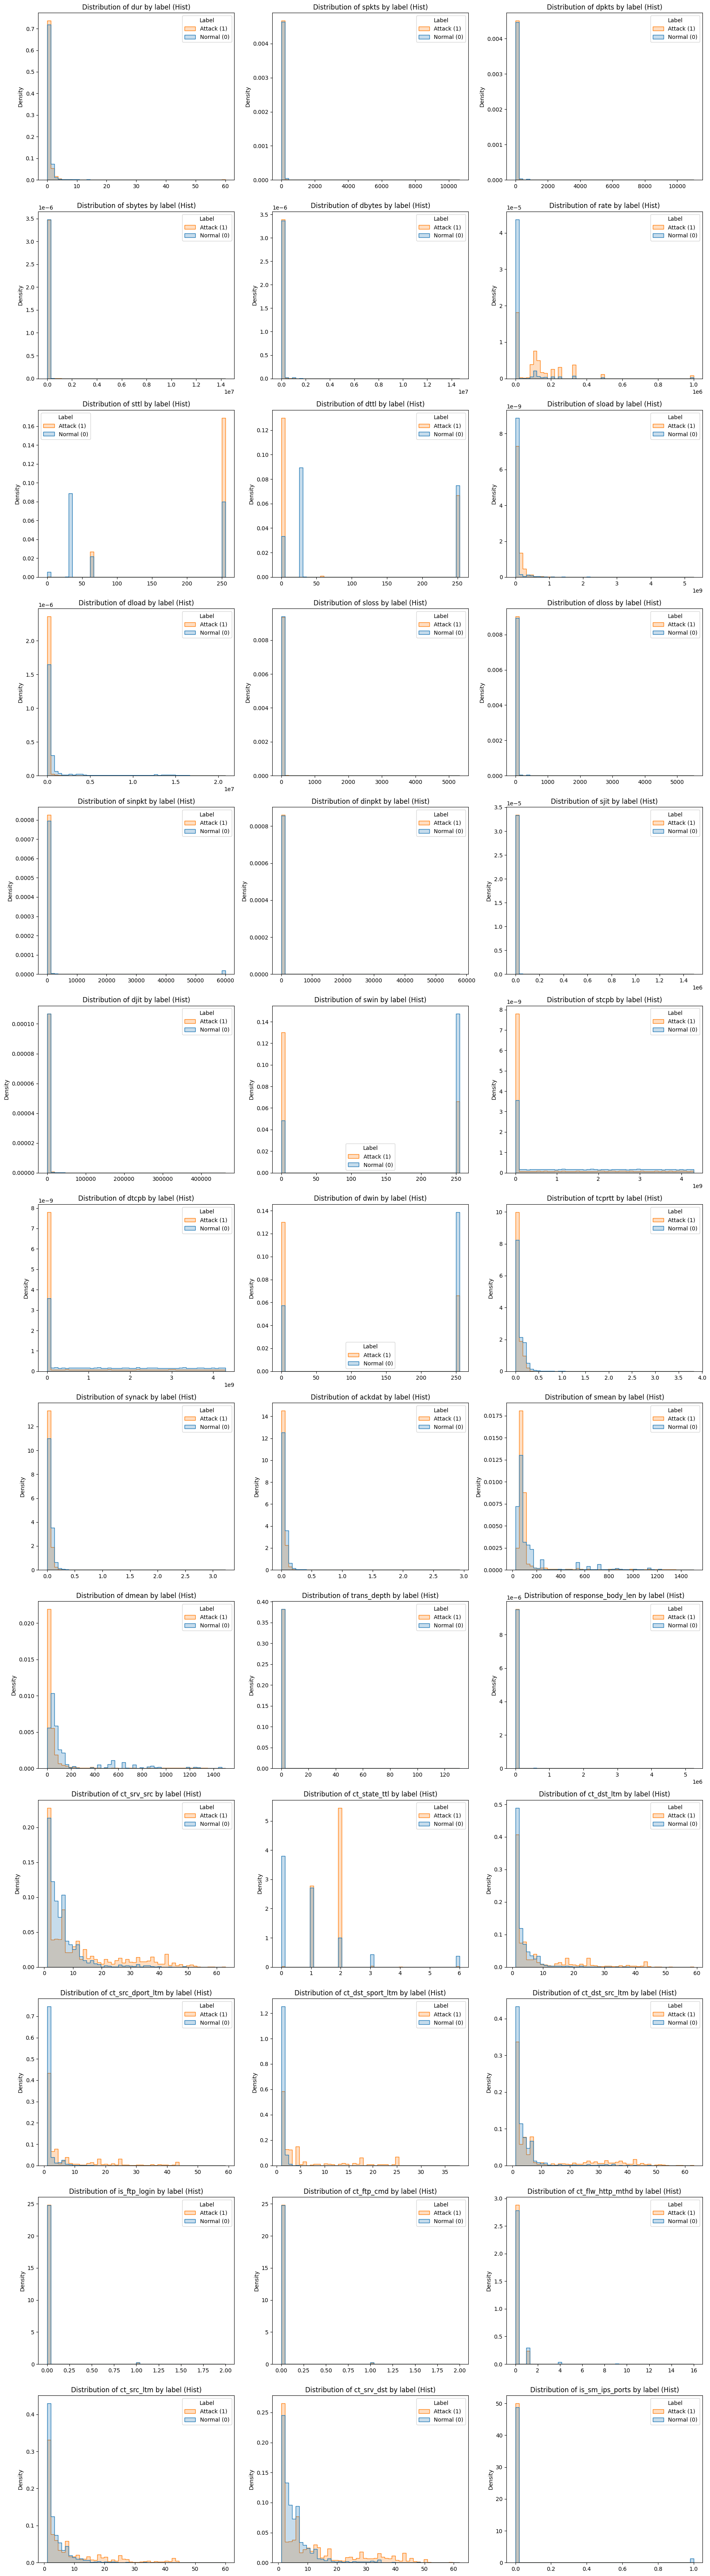


Generating density plots (KDE) for numerical features...


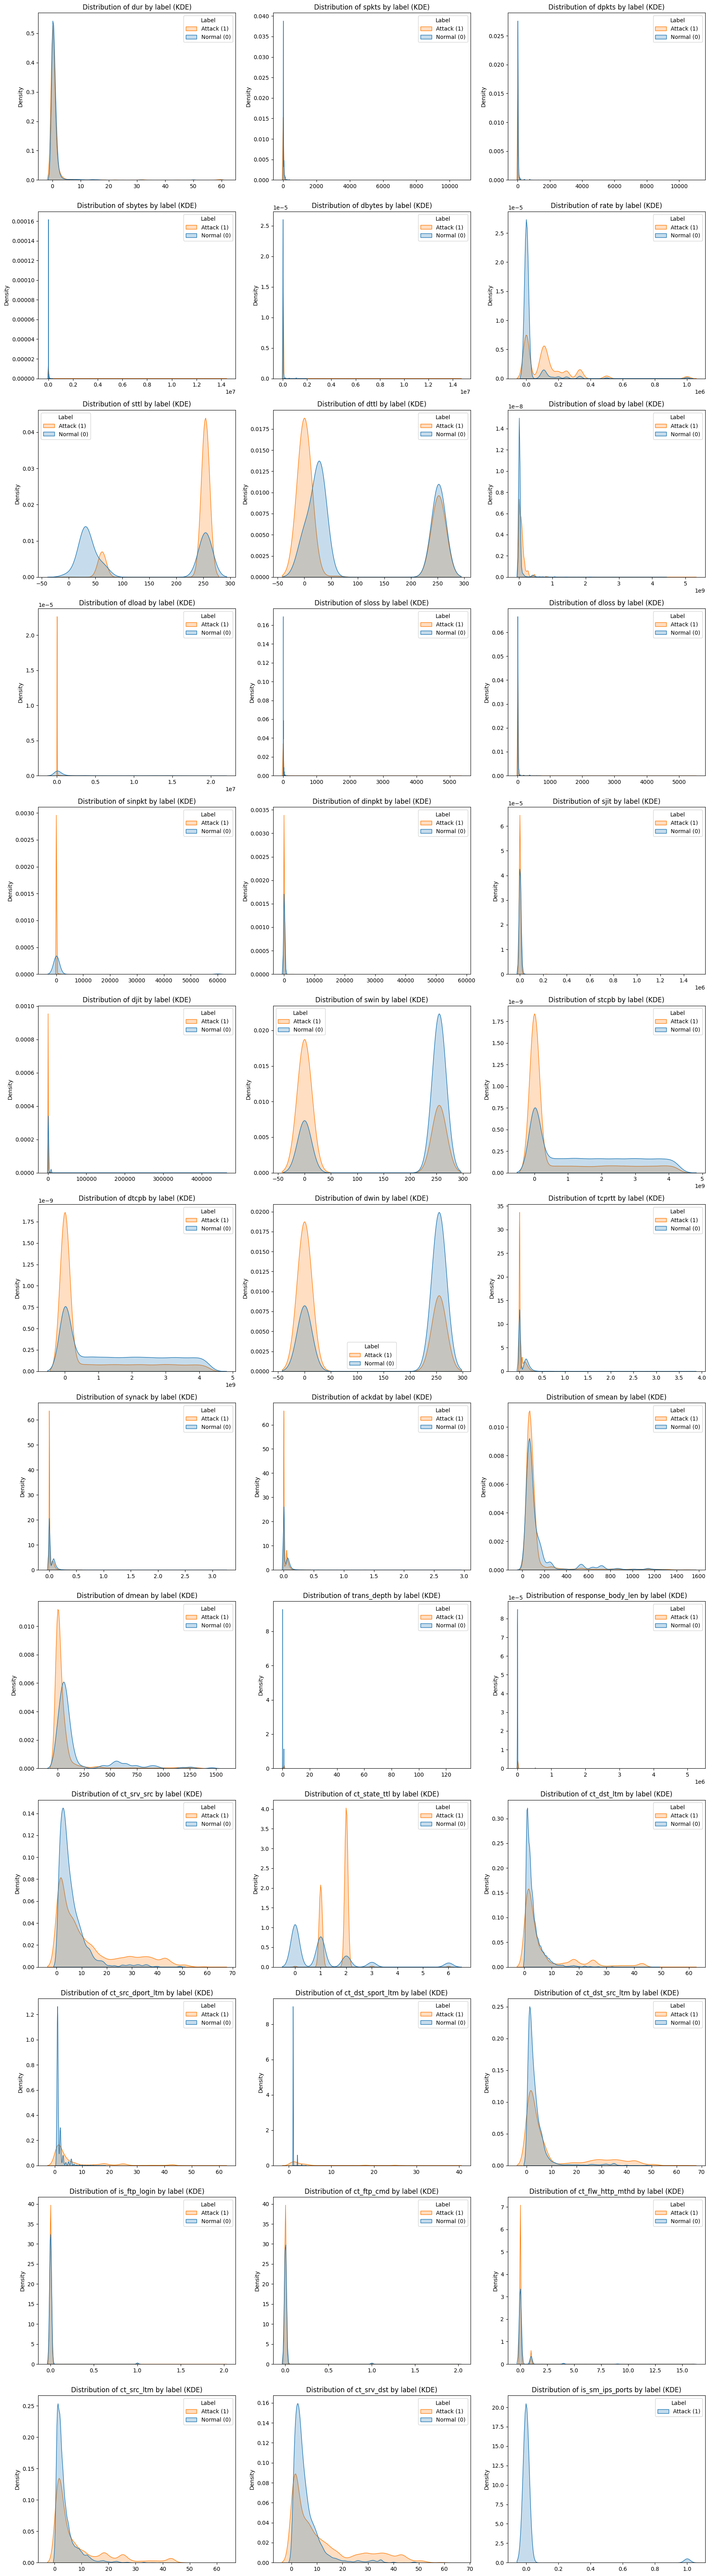

In [ ]:
# --- Refined Histograms ---
if len(numerical_features) > 0:
    print("Generating refined histograms for numerical features...")
    n_num_features = len(numerical_features)
    n_cols = 3
    n_rows = (n_num_features + n_cols - 1) // n_cols

    num_bins = 50

    fig_hist, axes_hist = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes_hist = axes_hist.flatten()

    for idx, feature in enumerate(numerical_features):
        sns.histplot(data=df, x=feature, hue=label_col, bins=num_bins, kde=False,
                     element="step", stat="density", common_norm=False, ax=axes_hist[idx])
        axes_hist[idx].set_title(f'Distribution of {feature} by label (Hist)')
        axes_hist[idx].set_xlabel('')
        axes_hist[idx].set_ylabel('Density')
        axes_hist[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)'])
    for j in range(idx + 1, len(axes_hist)):
        fig_hist.delaxes(axes_hist[j])

    plt.tight_layout()
    plt.show()

# --- Density Plots (KDE) ---
if len(numerical_features) > 0:
    print("\nGenerating density plots (KDE) for numerical features...")
    n_num_features = len(numerical_features)
    n_cols = 3
    n_rows = (n_num_features + n_cols - 1) // n_cols

    fig_kde, axes_kde = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes_kde = axes_kde.flatten()

    for idx, feature in enumerate(numerical_features):
        sns.kdeplot(data=df, x=feature, hue=label_col, common_norm=False, ax=axes_kde[idx], fill=True)
        axes_kde[idx].set_title(f'Distribution of {feature} by label (KDE)')
        axes_kde[idx].set_xlabel('')
        axes_kde[idx].set_ylabel('Density')
        axes_kde[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)'])

    for j in range(idx + 1, len(axes_kde)):
        fig_kde.delaxes(axes_kde[j])

    plt.tight_layout()
    plt.show()

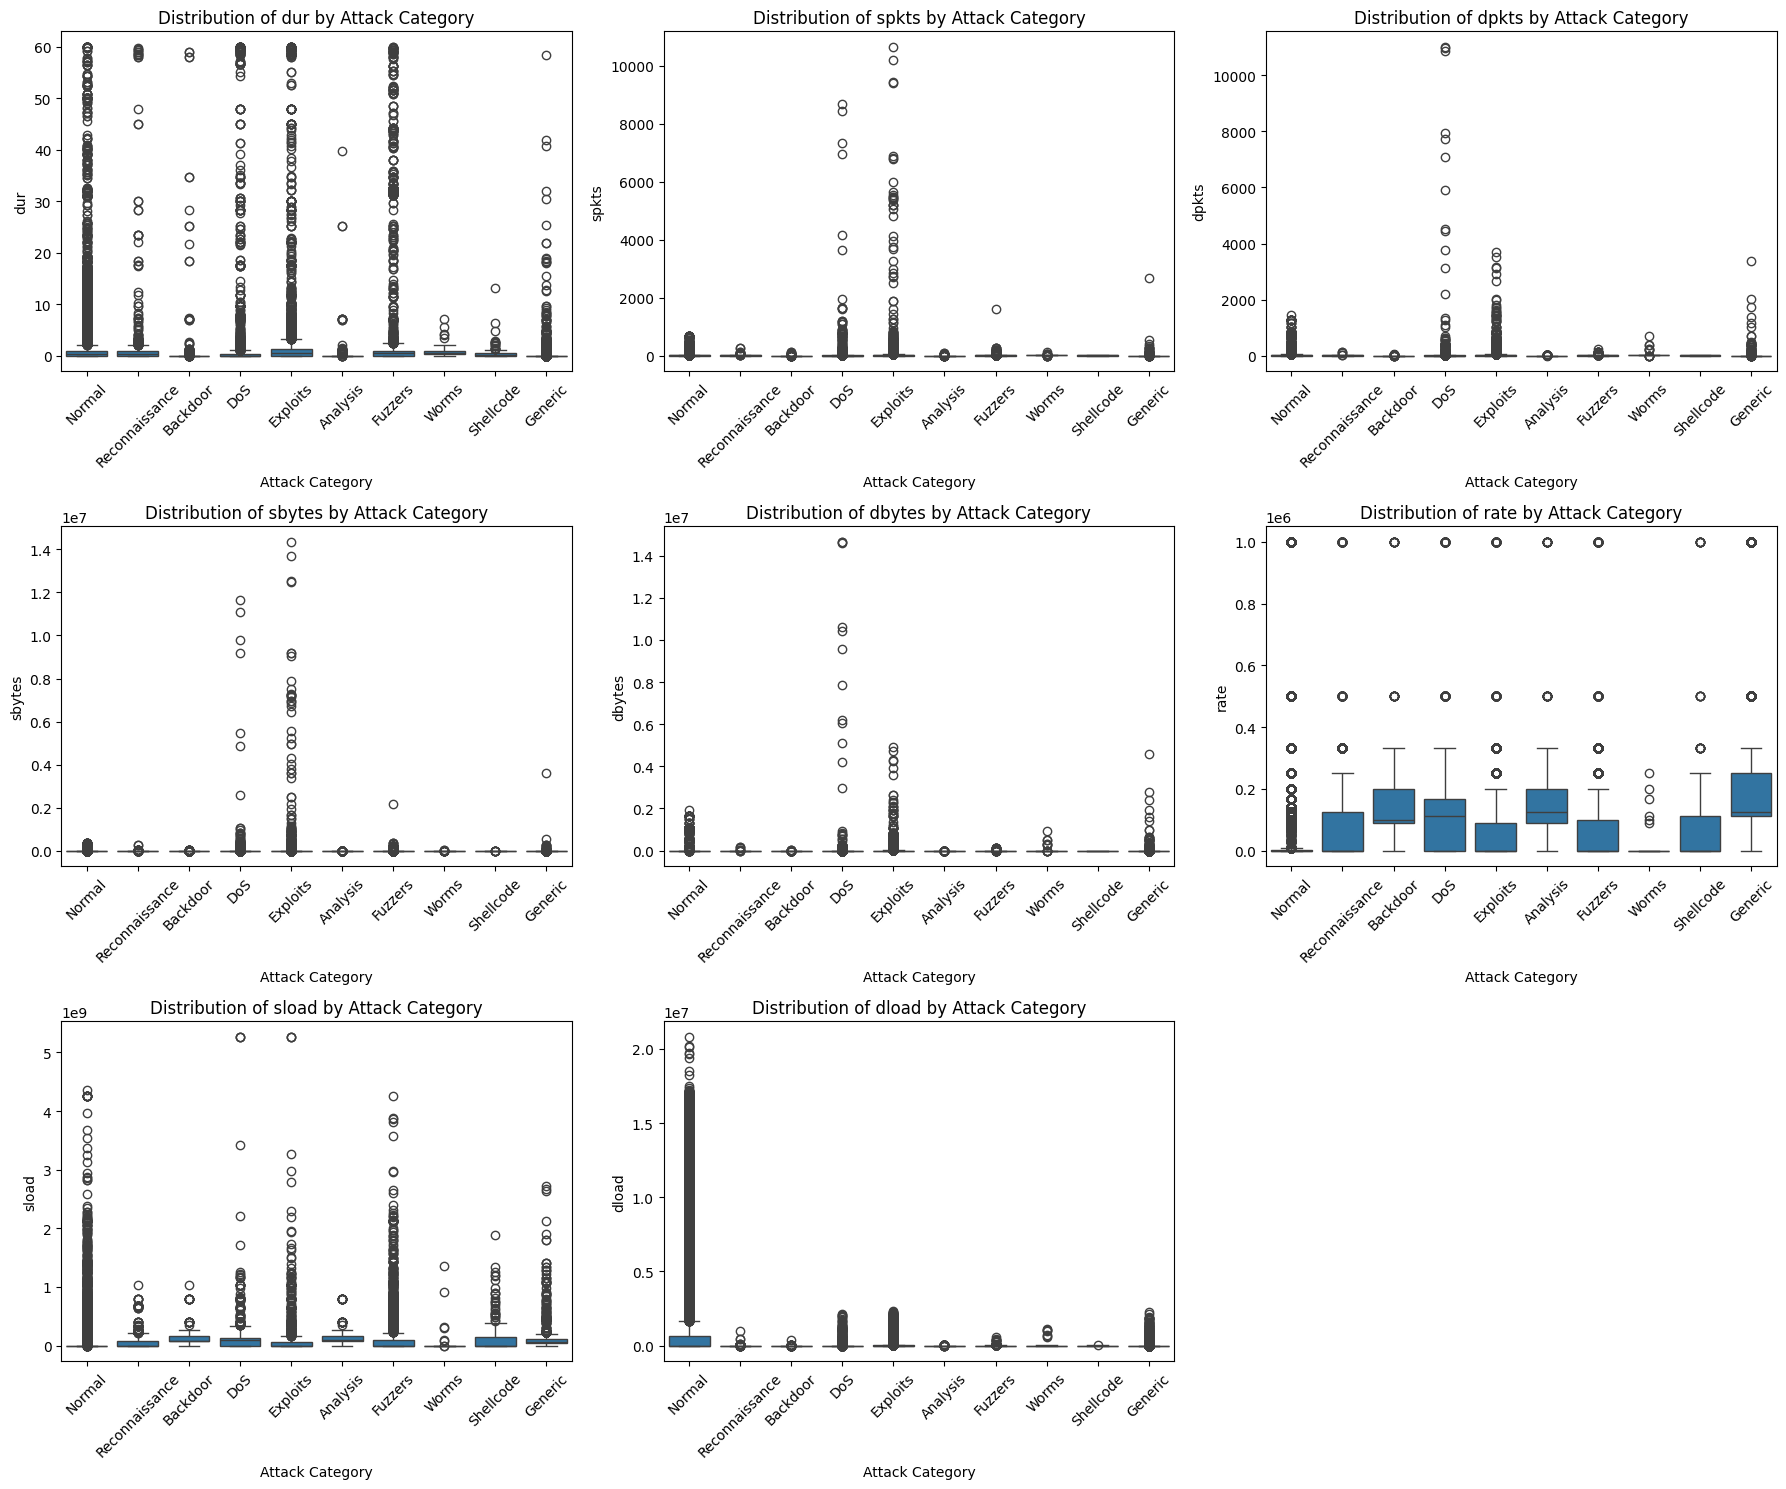

In [ ]:
# Visualize feature distributions by attack category for a selection of numerical features
numerical_features_for_viz = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload'] # Select a few key numerical features

n_features_viz = len(numerical_features_for_viz)
n_cols_viz = 3
n_rows_viz = (n_features_viz + n_cols_viz - 1) // n_cols_viz

fig, axes = plt.subplots(n_rows_viz, n_cols_viz, figsize=(18, 5 * n_rows_viz))
axes = axes.flatten()

for i, feature in enumerate(numerical_features_for_viz):
    sns.boxplot(data=df, x='attack_cat', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Attack Category')
    axes[i].set_xlabel('Attack Category')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()